Can you compare the time and the number of function values (n) that it takes for your Keister and Asian option examples?  Set a vector of tolerances, e.g., [0.1, 0.05, 0.02, 0.01, 0.005, ...] and measure time and n that it takes for Kronecker, lattice, Halton, and IID MC, and then plot them for comparison.

In [2]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tolerances = [1/x for x in [10, 100, 1000, 1e4, 1e5]]

In [4]:
# Keister
d = 2
s = 7
keister_sequences = [qp.Kronecker(dimension=d, alpha=[0.41319086, 0.22964061], seed=s, randomize=True),
                     qp.Lattice(dimension=d, seed=s),
                     qp.Halton(dimension=d, seed=s)]

keister_results = np.empty((2, len(keister_sequences), len(tolerances)))

In [5]:
for i, tolerance in enumerate(tolerances):
    for j, sequence in enumerate(keister_sequences):
        data = qp.CubQMCCLT(qp.Keister(sequence), abs_tol=tolerance).integrate()[1]
        keister_results[0][j][i] = data.time_integrate
        keister_results[1][j][i] = data.n_total

In [6]:
# Keister with IID points
iid = qp.IIDStdUniform(dimension=d, seed=s)
keister_iid_results = np.empty((2, len(tolerances)))
for i, tolerance in enumerate([1/x for x in [10, 100, 1000, 1e4]]):
    data = qp.CubMCCLT(qp.Keister(iid), abs_tol = tolerance).integrate()[1]
    keister_iid_results[0][i] = data.time_integrate
    keister_iid_results[1][i] = data.n_total

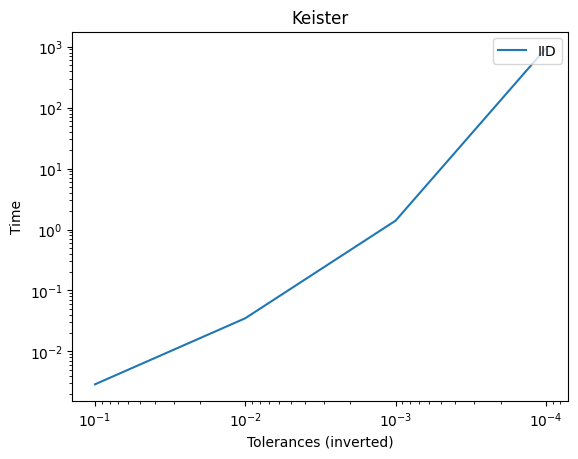

In [20]:
plt.loglog(tolerances[:4], keister_iid_results[0][:4], label = 'IID')
plt.gca().invert_xaxis()

plt.title('Keister')
plt.xlabel('Tolerances (inverted)')
plt.ylabel('Time')
plt.legend(loc='upper right')
plt.show()

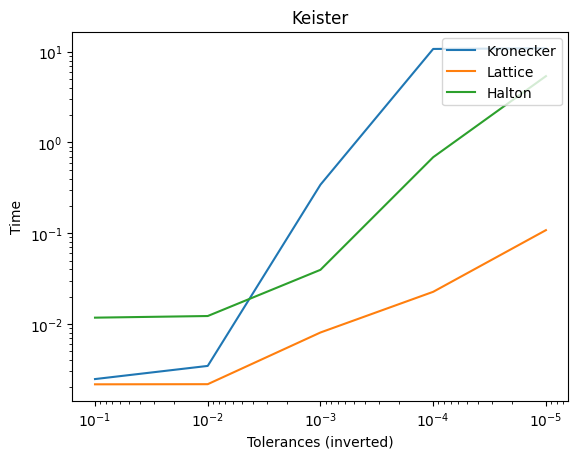

In [7]:
sequences = ['Kronecker', 'Lattice', 'Halton']

for i, seq in enumerate(sequences):
    plt.loglog(tolerances, keister_results[0][i], label=seq)

# plt.loglog(tolerances[:4], keister_iid_results[0][:4], label = 'IID')
plt.gca().invert_xaxis()

plt.title('Keister')
plt.xlabel('Tolerances (inverted)')
plt.ylabel('Time')
plt.legend(loc='upper right')
plt.show()

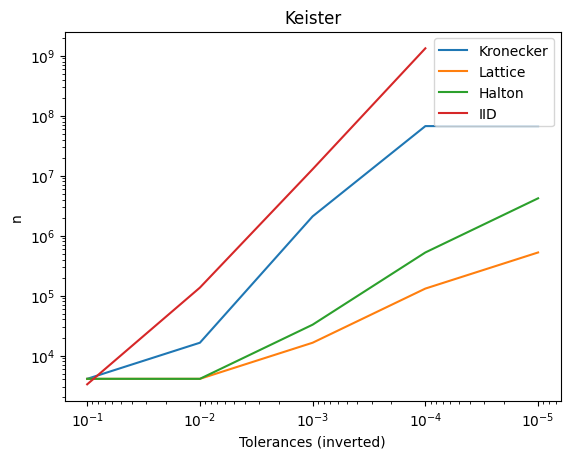

In [25]:
sequences = ['Kronecker', 'Lattice', 'Halton']

for i, seq in enumerate(sequences):
    plt.loglog(tolerances, keister_results[1][i], label=seq)

plt.loglog(tolerances[:4], keister_iid_results[1][:4], label = 'IID')

plt.gca().invert_xaxis()

plt.title('Keister')
plt.xlabel('Tolerances (inverted)')
plt.ylabel('n')
plt.legend(loc='upper right')
plt.show()

In [13]:
# Asian option
dimension = 4
seed = 7

asian_sequences = [qp.Kronecker(dimension=dimension, alpha=[0.41319086, 0.22964061], seed=seed, randomize=True),
                     qp.Lattice(dimension=dimension, seed=seed),
                     qp.Halton(dimension=dimension, seed=seed)]

asian_results = np.empty((2, len(asian_sequences), len(tolerances[:4])))

In [17]:
for i, tolerance in enumerate(tolerances[:4]):
    for j, sequence in enumerate(asian_sequences):
        data = qp.CubQMCCLT(qp.AsianOption(sequence), abs_tol=tolerance).integrate()[1]
        asian_results[0][j][i] = data.time_integrate
        asian_results[1][j][i] = data.n_total

In [ ]:
# Asian Option with IID points
iid = qp.IIDStdUniform(dimension=dimension, seed=seed)
asian_iid_results = np.empty((2, 3))
for i, tolerance in enumerate([1/x for x in [10, 100, 1000]]):
    data = qp.CubMCCLT(qp.AsianOption(iid), abs_tol = tolerance).integrate()[1]
    asian_iid_results[0][i] = data.time_integrate
    asian_iid_results[1][i] = data.n_total

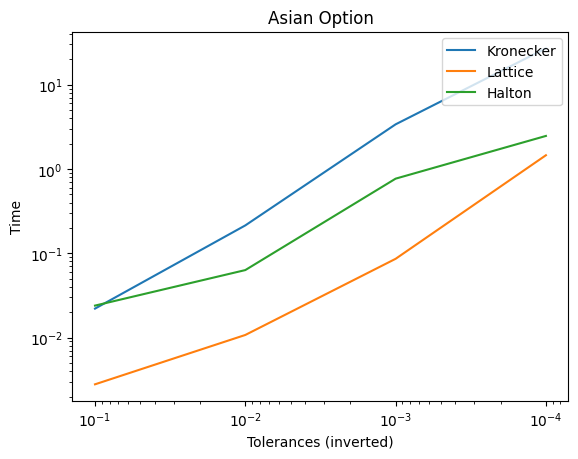

In [18]:
for i, seq in enumerate(sequences):
    plt.loglog(tolerances[:4], asian_results[0][i], label=seq)

# plt.loglog(tolerances[:4], keister_iid_results[0][:4], label = 'IID')
plt.gca().invert_xaxis()

plt.title('Asian Option')
plt.xlabel('Tolerances (inverted)')
plt.ylabel('Time')
plt.legend(loc='upper right')
plt.show()

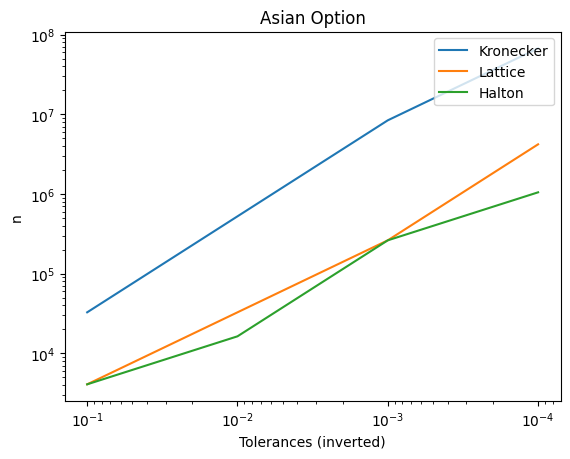

In [19]:
for i, seq in enumerate(sequences):
    plt.loglog(tolerances[:4], asian_results[1][i], label=seq)

# plt.loglog(tolerances[:4], keister_iid_results[0][:4], label = 'IID')
plt.gca().invert_xaxis()

plt.title('Asian Option')
plt.xlabel('Tolerances (inverted)')
plt.ylabel('n')
plt.legend(loc='upper right')
plt.show()